<a class="anchor" id="0.1"></a>
<h1>Lab | Comparing regression models</h1><br>

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

<h2>Instructions</h2><br>

* 1. [In this final lab, we will model our data. Import sklearn train_test_split and separate the data.](#1)
* 2. [Try a simple linear regression with all the data to see whether we are getting good results.](#2)
* 3. [Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.](#3)
* 4. [Use the function to check LinearRegressor and KNeighborsRegressor.](#4)
* 5. [You can check also the MLPRegressor for this task!](#5)
* 6. [Check and discuss the results.](#6)

**Copy paste from previous LABs**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer_df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ','_')

In [4]:
# Convert dates in datetime format

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

# Transform the column into a column that gives us only the month and the year

customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(lambda x: x.strftime('%B-%Y'))

In [5]:
customer_df.drop(["customer"], axis=1, inplace = True)

### Removing outliers

In [6]:
# Creating a function that removes all the outliers automatically from the dataframe

def outliers_remover(df):
    print("Old Shape: ", df.shape)
    continuous_variables = df.select_dtypes(include='number') # Getting only numerical features
    for column in continuous_variables.columns:
        q75,q25 = np.percentile(df.loc[:,column],[75,25]) # Calculate the interquartiles
        intr_qr = q75-q25 # Interquartile range
        max = q75+(1.5*intr_qr) # Setting the upper edge
        min = q25-(1.5*intr_qr) # Setting the lower edge
        df.loc[df[column] < min,column] = np.nan # Transforming outliers into nans
        df.loc[df[column] > max,column] = np.nan
        # df = df.dropna().reset_index(drop=True) # Dropping the nans from the database
        
# Doing the sanity check I saw that the feature customer_lifetime_value still has nans
# I tried everything I could but it has no sense that it removes ALL the outliers but the first feature
# I sincerely don't get how it's interating throughout all the loop, calculating the outliers, transforming them into nans
# but not removing the nans. Only for the first feature, for the rest of the features it work perfectly. I'll do it manually.

    print("New Shape: ", df.shape)

In [7]:
outliers_remover(customer_df)

Old Shape:  (9134, 23)
New Shape:  (9134, 23)


In [8]:
customer_df.isnull().sum() # Checking the nans

state                               0
customer_lifetime_value           817
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto              430
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints        1882
number_of_policies                416
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                453
vehicle_class                       0
vehicle_size                        0
dtype: int64

In [9]:
# Removing the nans manually

customer_df = customer_df.dropna().reset_index(drop=True)
customer_df.isnull().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
customer_df.shape # Checking the new shape

(5911, 23)

### Create a copy of the dataframe for the data wrangling

In [11]:
customer_df_new = customer_df.copy()
customer_df_new

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,February-2011,Employed,F,56274.0,Suburban,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Nevada,12887.431650,No,Premium,Bachelor,February-2011,Employed,F,48767.0,Suburban,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
2,California,7645.861827,No,Basic,Bachelor,January-2011,Unemployed,M,0.0,Suburban,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
3,Washington,2813.692575,No,Basic,Bachelor,February-2011,Employed,M,43836.0,Rural,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
4,Oregon,8256.297800,Yes,Basic,Bachelor,January-2011,Employed,F,62902.0,Rural,...,94.0,0.0,2.0,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,California,5032.165498,No,Basic,College,February-2011,Employed,M,66367.0,Suburban,...,48.0,0.0,3.0,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
5907,California,4100.398533,No,Premium,College,January-2011,Employed,F,47761.0,Suburban,...,58.0,0.0,1.0,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
5908,California,3096.511217,Yes,Extended,College,February-2011,Employed,F,21604.0,Suburban,...,28.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
5909,California,7524.442436,No,Extended,College,February-2011,Employed,M,21941.0,Suburban,...,3.0,0.0,3.0,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### Normalize the continuous variables

In [12]:
# First of all, splitting between target and explanative variables

X = customer_df_new.drop(columns="total_claim_amount", axis=1)
y = customer_df_new.total_claim_amount

In [13]:
# Normalizing numerical features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [14]:
num_X = X.select_dtypes(include='number') # Getting numerical features from the explanatives variables

X[num_X.columns] = scaler.fit_transform(num_X) # Apply MinMax transformation and store the result back into X 

In [15]:
X # Sanity check

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0.053337,No,Basic,Bachelor,February-2011,Employed,F,0.562847,Suburban,...,0.914286,0.050505,0.0,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Nevada,0.755758,No,Premium,Bachelor,February-2011,Employed,F,0.487763,Suburban,...,0.514286,0.383838,0.0,0.142857,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
2,California,0.392086,No,Basic,Bachelor,January-2011,Unemployed,M,0.000000,Suburban,...,0.514286,0.656566,0.0,0.857143,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
3,Washington,0.056818,No,Basic,Bachelor,February-2011,Employed,M,0.438443,Rural,...,0.342857,0.444444,0.0,0.000000,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
4,Oregon,0.434439,Yes,Basic,Bachelor,January-2011,Employed,F,0.629140,Rural,...,0.400000,0.949495,0.0,0.142857,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,California,0.210741,No,Basic,College,February-2011,Employed,M,0.663796,Suburban,...,0.171429,0.484848,0.0,0.285714,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Small
5907,California,0.146093,No,Premium,College,January-2011,Employed,F,0.477701,Suburban,...,0.457143,0.585859,0.0,0.000000,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
5908,California,0.076441,Yes,Extended,College,February-2011,Employed,F,0.216081,Suburban,...,0.400000,0.282828,0.0,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
5909,California,0.383661,No,Extended,College,February-2011,Employed,M,0.219452,Suburban,...,0.971429,0.030303,0.0,0.285714,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Encode the categorical variables

In [16]:
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offer type
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

# data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.

In [17]:
# Taking a look on the categorical features

categorical_X = X.select_dtypes(include="object")
categorical_X.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [18]:
# To begin with, manually selecting the features that are going to be encoded with the OneHotEncoder

categorical_one_hot = X[['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 
                         'vehicle_class']]

In [19]:
# Dummifying the selected features

for feature in categorical_one_hot:
    one_hot = pd.get_dummies(X[feature]) # Dummifies the features  
    X = X.drop(feature,axis = 1) # Dropping the original features
    X = X.join(one_hot) # Joining the modified features

In [20]:
X.head() # Sanity check

,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,monthly_premium_auto,...,Offer3,Offer4,Agent,Branch,Call Center,Web,Four-Door Car,SUV,Sports Car,Two-Door Car
0,0.053337,No,Basic,Bachelor,February-2011,Employed,F,0.562847,Suburban,0.073394,...,0,0,1,0,0,0,0,0,0,1
1,0.755758,No,Premium,Bachelor,February-2011,Employed,F,0.487763,Suburban,0.431193,...,0,0,1,0,0,0,0,0,0,1
2,0.392086,No,Basic,Bachelor,January-2011,Unemployed,M,0.000000,Suburban,0.412844,...,0,0,0,0,1,0,0,1,0,0
3,0.056818,No,Basic,Bachelor,February-2011,Employed,M,0.438443,Rural,0.110092,...,0,0,1,0,0,0,1,0,0,0
4,0.434439,Yes,Basic,Bachelor,January-2011,Employed,F,0.629140,Rural,0.073394,...,0,0,0,0,0,1,0,0,0,1


In [21]:
# Checking the rest of the categorical features, wich they are going to be ordinal scaled

categorical_X = X.select_dtypes(include="object")
categorical_X.columns

Index(['response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'vehicle_size'],
      dtype='object')

In [22]:
# Checking the unique values for each remaining categorical features

for feature in categorical_X:
    print('\033[1m',feature,'\033[0m')
    print("Unique values of {} are: {}".format(feature, categorical_X[feature].unique()))
    print("")

 response 
Unique values of response are: ['No' 'Yes']

 coverage 
Unique values of coverage are: ['Basic' 'Premium' 'Extended']

 education 
Unique values of education are: ['Bachelor' 'Master' 'College' 'High School or Below' 'Doctor']

 effective_to_date 
Unique values of effective_to_date are: ['February-2011' 'January-2011']

 employmentstatus 
Unique values of employmentstatus are: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']

 gender 
Unique values of gender are: ['F' 'M']

 location_code 
Unique values of location_code are: ['Suburban' 'Rural' 'Urban']

 vehicle_size 
Unique values of vehicle_size are: ['Medsize' 'Small' 'Large']



In [23]:
# Ordinal encoding the remaining categorical features

X["response"] = X["response"].map({"No" : 0, "Yes" : 1})
X["coverage"] = X["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X["education"] = X["education"].map({"High School or Below" : 0, "Bachelor" : 1, "College" : 2, "Master" : 3, "Doctor" : 4})
X["effective_to_date"] = X["effective_to_date"].map({"January-2011" : 0, "February-2011" : 1})
X["employmentstatus"] = X["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
X["gender"] = X["gender"].map({"F" : 0, "M" : 1})
X["location_code"] = X["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X["vehicle_size"] = X["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [24]:
X # Sanity check

,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,monthly_premium_auto,...,Offer3,Offer4,Agent,Branch,Call Center,Web,Four-Door Car,SUV,Sports Car,Two-Door Car
0,0.053337,0,0,1,1,0,0,0.562847,1,0.073394,...,0,0,1,0,0,0,0,0,0,1
1,0.755758,0,2,1,1,0,0,0.487763,1,0.431193,...,0,0,1,0,0,0,0,0,0,1
2,0.392086,0,0,1,0,1,1,0.000000,1,0.412844,...,0,0,0,0,1,0,0,1,0,0
3,0.056818,0,0,1,1,0,1,0.438443,0,0.110092,...,0,0,1,0,0,0,1,0,0,0
4,0.434439,1,0,1,0,0,0,0.629140,0,0.073394,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,0.210741,0,0,2,1,0,1,0.663796,1,0.027523,...,0,0,0,0,1,0,0,0,0,1
5907,0.146093,0,2,2,0,0,0,0.477701,1,0.394495,...,0,0,0,1,0,0,1,0,0,0
5908,0.076441,1,1,2,1,0,0,0.216081,1,0.165138,...,0,0,0,1,0,0,1,0,0,0
5909,0.383661,0,1,2,1,0,1,0.219452,1,0.321101,...,1,0,0,1,0,0,1,0,0,0


### Time variable

>I already changed the time feature to a more useful feature, selecting the month and the year. It's already encoded also.

### Check and make sure that every column is numerical

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5911 entries, 0 to 5910
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        5911 non-null   float64
 1   response                       5911 non-null   int64  
 2   coverage                       5911 non-null   int64  
 3   education                      5911 non-null   int64  
 4   effective_to_date              5911 non-null   int64  
 5   employmentstatus               5911 non-null   int64  
 6   gender                         5911 non-null   int64  
 7   income                         5911 non-null   float64
 8   location_code                  5911 non-null   int64  
 9   monthly_premium_auto           5911 non-null   float64
 10  months_since_last_claim        5911 non-null   float64
 11  months_since_policy_inception  5911 non-null   float64
 12  number_of_open_complaints      5911 non-null   f

>Every column is numerical

# Here starts this Lab | Comparing regression models

## 1. Import sklearn train_test_split and separate the data <a class="anchor" id="1"></a>
[Instructions](#0.1)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

In [27]:
# Checking if every done value matches

print("Number of rows of X_train = {}".format(len(X_train)))
print("Number of rows of X_test = {}".format(len(X_test)))
print("Number of rows of y_train= {}".format(len(y_train)))
print("Number of rows of y_test = {}".format(len(y_test)))
print("Percentage of train values = {}".format(round(len(X_train)/len(X), 4) * 100),"%")

Number of rows of X_train = 4433
Number of rows of X_test = 1478
Number of rows of y_train= 4433
Number of rows of y_test = 1478
Percentage of train values = 75.0 %


## 2. Try a simple linear regression <a class="anchor" id="2"></a>
[Instructions](#0.1)

In [28]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
# Let's see the results

from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = regressor.predict(X_train)
mse = mean_squared_error(y_train, predictions, squared=True)
rmse = mean_squared_error(y_train, predictions, squared=False)
mae = mean_absolute_error(y_train, predictions)

print("R2 score of Train : {}".format(regressor.score(X_train, y_train)))
print("R2 score of Test : {}".format(regressor.score(X_test, y_test)))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R2 score of Train : 0.5275476417960587
R2 score of Test : 0.5232509569052242
MSE: 20397.99896799437
RMSE: 142.82156338590602
MAE: 112.47496484143439


## 3. Define a function to apply different models <a class="anchor" id="3"></a>
[Instructions](#0.1)

In [30]:
def regression_models(regressor, X_train, X_test, y_train, y_test):
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_train)
    predictions_test = regressor.predict(X_test)
    
    mse_train = mean_squared_error(y_train, predictions, squared=True)
    rmse_train = mean_squared_error(y_train, predictions, squared=False)
    mae_train = mean_absolute_error(y_train, predictions)
    
    mse_test = mean_squared_error(y_test, predictions_test, squared=True)
    rmse_test = mean_squared_error(y_test, predictions_test, squared=False)
    mae_test = mean_absolute_error(y_test, predictions_test)
    
    print("R2 score of Train : {}".format(regressor.score(X_train, y_train)))
    print("R2 score of Test : {}".format(regressor.score(X_test, y_test)))
    print("MSE of Train:", mse_train)
    print("MSE of Test:", mse_test)
    print("RMSE of Train:", rmse_train)
    print("RMSE of Test:", rmse_test)
    print("MAE of Train:", mae_train)
    print("MAE of Test:", mae_test)
    print("------------------------")
    
    fig, ax = plt.subplots()
    x = predictions_test[:30]
    y = y_test[:30]
    t = np.arange(0, x.size)
    plt.scatter(t,x)
    plt.scatter(t,y)

    plt.xlabel("index of the test set")
    plt.ylabel("target")

    plt.legend(["predictions test", "groundtruth"], loc = "upper right")

    plt.show()

## 4. Use the function to check LinearRegressor and KNeighborsRegressor <a class="anchor" id="4"></a>
[Instructions](#0.1)

In [31]:
# First of all, setting the variables for the models

# This is the regressor one, not to be confused with the classifier one
from sklearn.neighbors import KNeighborsRegressor # This is the regressor one

linear_regression = LinearRegression()
kneighbors_2 = KNeighborsRegressor(n_neighbors=2)
kneighbors_100 = KNeighborsRegressor(n_neighbors=100)

R2 score of Train : 0.5275476417960587
R2 score of Test : 0.5232509569052242
MSE of Train: 20397.99896799437
MSE of Test: 20190.908278256
RMSE of Train: 142.82156338590602
RMSE of Test: 142.0947158702814
MAE of Train: 112.47496484143439
MAE of Test: 109.80481669963503
------------------------


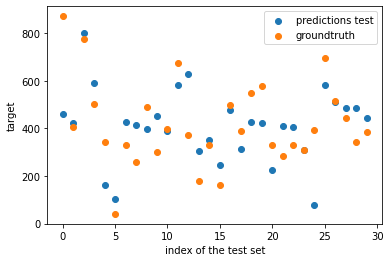

In [32]:
# Linear Regression

regression_models(linear_regression, X_train, X_test, y_train, y_test)

R2 score of Train : 0.8127225576375233
R2 score of Test : 0.4594711312696307
MSE of Train: 8085.651409510851
MSE of Test: 22892.062329980916
RMSE of Train: 89.9202502749567
RMSE of Test: 151.3012304311532
MAE of Train: 60.64410085788404
MAE of Test: 107.28882211129907
------------------------


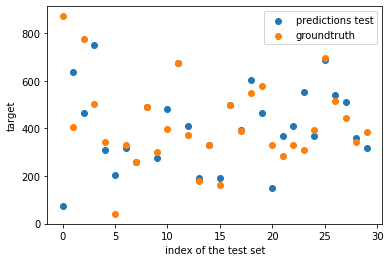

In [33]:
# KNeighborsRegressor with 2 neighbors

regression_models(kneighbors_2, X_train, X_test, y_train, y_test)

R2 score of Train : 0.5008951577064004
R2 score of Test : 0.4906308644781986
MSE of Train: 21548.712544749676
MSE of Test: 21572.40930853992
RMSE of Train: 146.7947974035513
RMSE of Test: 146.8754891346406
MAE of Train: 114.92795633658922
MAE of Test: 114.52953801118403
------------------------


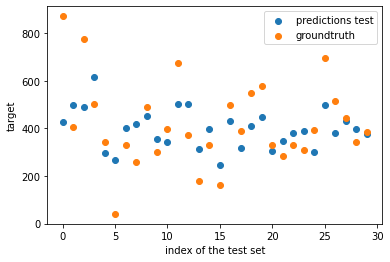

In [34]:
# KNeighborsRegressor with 100 neighbors

regression_models(kneighbors_100, X_train, X_test, y_train, y_test)

>We can see that the LinearRegression model has poor scores, it has almost the same chance to predict a result than flipping a coin.<br>
<br>
>It seems that we can get better results with the KNeighborsRegressor model but there is a clear underfitting. I tryed to improve the results by increasing the neighbors and it didn't work.

### Finding the best K for KNN Regression through the mean absolute error

Text(0, 0.5, 'Mean Absolute Error')

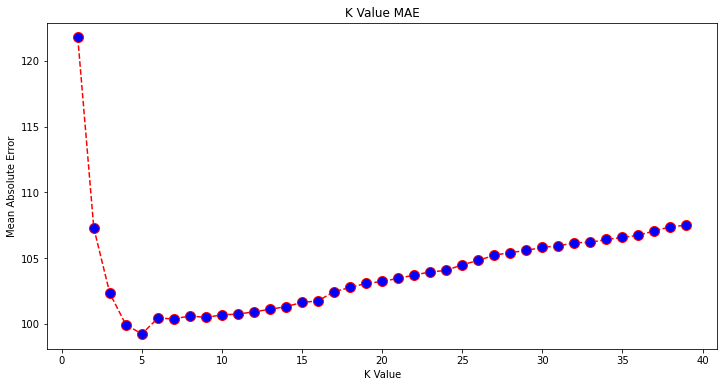

In [35]:
error = []

for i in range(1, 40): # Calculating MAE error for K values between 1 and 39
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    error.append(mae)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

R2 score of Train : 0.7098999553383796
R2 score of Test : 0.5670712840778218
MSE of Train: 12524.988623442303
MSE of Test: 18335.063532513745
RMSE of Train: 111.91509560127402
RMSE of Test: 135.40702911043334
MAE of Train: 81.56376980157906
MAE of Test: 99.2125254519621
------------------------


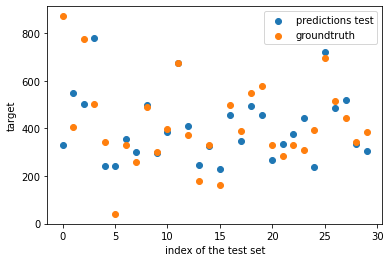

In [36]:
# We can see that K5 is the best K possible based on MAE

kneighbors_5 = KNeighborsRegressor(n_neighbors=5)

regression_models(kneighbors_5, X_train, X_test, y_train, y_test)

>Even with that, the results are not really good, this is a poor model to learn

## 5. You can check also the MLPRegressor for this task <a class="anchor" id="5"></a>
[Instructions](#0.1)

In [37]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [38]:
mlpr.predict(X_test)

array([636.04579699, 464.05836008, 606.6233983 , ..., 247.52793114,
       258.757559  , 489.36671433])

In [39]:
print("Results of the MLPRegressor model:")
print("R2 score of Train : {}".format(mlpr.score(X_train, y_train)))
print("R2 score of Test : {}".format(mlpr.score(X_test, y_test)))

Results of the MLPRegressor model:
R2 score of Train : 0.8279712998627582
R2 score of Test : 0.8226104771237023


## 6. Check and discuss the results <a class="anchor" id="6"></a>
[Instructions](#0.1)

* I applyed three different models, a simple Linear regression, the KNeighborsRegressor and the MLPRegressor.
* Applying a Linear Regression model we get poor scores in both train and test set of 0.52 and it means that the model is too weak to be able to predict anything.
* When I applyed the KNeighborsRegressor I got good results on the train set but really bad ones on the test set, showing a clear underfitting. I modifyed the number of neighbors and I checked the best number to fit as a neighbor but even with that, the results are not good, having a clear underfitting.
* Ultimately I applyed the MLPRegressor and I got a result of the R2 score of 0.83 on the train set and 0.82 on the test set, giving us the best result of all the three models by far.